# Imports

In [1]:
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from imutils import paths
from os.path import dirname, join
import imutils
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import argparse
import dlib
import numpy as np

# Importando o dataset de validação e o modelo

In [2]:
caminho = 'datasetreal/'
files = list(paths.list_images(caminho))

data = []
labels = []

for file in files:
    label = file.split(os.path.sep)[-2]

    image = load_img(file, target_size=(224, 224))
    image = img_to_array(image)
    image = preprocess_input(image)

    data.append(image)
    labels.append(label)
data = np.array(data, dtype="float32")
labels = np.array(labels)


lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)


(trainX, testX, trainY, testY) = train_test_split(data, labels,test_size=.95, stratify=labels, random_state=42)

model = load_model('modelo/modelo.h5')

# Salvando as predições na variável preds

In [3]:
preds = model.predict(testX, batch_size=32)
preds = np.argmax(preds, axis=1)

# Realizando o Relatório de Classificação

In [4]:
print("Avaliando Rede: Relatório de Classificação")
print(classification_report(testY.argmax(axis=1), preds, target_names=lb.classes_))

Avaliando Rede: Relatório de Classificação
                 precision    recall  f1-score   support

datasetreal/com       1.00      1.00      1.00        47
datasetreal/sem       1.00      1.00      1.00        48

       accuracy                           1.00        95
      macro avg       1.00      1.00      1.00        95
   weighted avg       1.00      1.00      1.00        95



# Realizando a Matriz de Confusão

<AxesSubplot:>

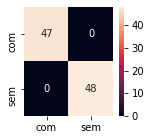

In [5]:
confusao = confusion_matrix(testY.argmax(axis=1), preds)
df_cm = pd.DataFrame(confusao, index = ['com', 'sem'],
                  columns = ['com', 'sem'])
plt.figure(figsize = (2,2))
sn.heatmap(df_cm, annot=True)